In [1]:
import PIL
import numpy as np
from PIL import Image, ImageDraw, ImageOps
import os, tqdm
import math
from sympy import *
import time

In [2]:
%matplotlib inline
import random
import glob
import os
from PIL import Image
import torch
import torchvision
from torch.autograd import Variable
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import utils.util as util
import utils.align as align
from models import networks
from options.test_options import TestOptions
import utils.visualize_test as visualize_test
img_show_128, img_pre_128 = visualize_test.get_trans(128, 128)

/data2/minjunli/tol/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/data2/minjunli/tol/anaconda2/lib/python2.7/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [11]:
png_list = glob.glob('/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male_crop_basemn/*')
for path in png_list:
    im = Image.open(path)
    print im.size

(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)

(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)

(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)

In [9]:
from tqdm import tqdm
lambda1 = 77.0
lambda2 = 228.0
lambda3 = 111.0
png_list = glob.glob('/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/*')
save_dir = '/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male_crop_basemn'
wrong_list = []
if not os.path.exists(save_dir):
    print 'dir not exist'
    os.mkdir(save_dir)
for path in tqdm(png_list):
    try:
        attr = align.face_detect(path)
        im = Image.open(path)
        B_ = align.align_eye_pad_ailab(im, attr, lambda1, lambda2, lambda3)
        base_name = os.path.basename(path) 
        B_.save(os.path.join(save_dir, base_name))
    except:
        print path
        wrong_list.append(path)



  0%|          | 1/3055 [00:03<2:34:25,  3.03s/it]

  5%|▍         | 147/3055 [07:04<2:20:29,  2.90s/it]


 10%|▉         | 293/3055 [14:05<2:09:03,  2.80s/it]


 11%|█         | 332/3055 [15:58<2:08:28,  2.83s/it]

/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/bradymzhang.png



 11%|█▏        | 350/3055 [16:50<2:07:39,  2.83s/it]

/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/benbinwu.png



 16%|█▌        | 496/3055 [23:53<2:04:04,  2.91s/it]


 21%|██        | 637/3055 [30:39<1:54:40,  2.85s/it]

/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/jackkingjin.png



 26%|██▌       | 783/3055 [37:41<1:49:03,  2.88s/it]


 30%|███       | 929/3055 [45:00<1:42:31,  2.89s/it]


 31%|███       | 953/3055 [46:10<1:40:07,  2.86s/it]

/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/arnoldhuang.png



 36%|███▌      | 1097/3055 [53:05<1:34:39,  2.90s/it]


 39%|███▉      | 1197/3055 [57:53<1:26:53,  2.81s/it]

/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/virgilliu.png



 41%|████      | 1246/3055 [1:00:14<1:25:55,  2.85s/it]

/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/zwlzhang.png



 45%|████▌     | 1384/3055 [1:06:53<1:20:15,  2.88s/it]


 46%|████▋     | 1417/3055 [1:08:28<1:19:46,  2.92s/it]

/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/v_zhguo.png.1



 51%|█████     | 1555/3055 [1:15:08<1:12:32,  2.90s/it]


 55%|█████▌    | 1693/3055 [1:21:45<1:05:45,  2.90s/it]


 60%|█████▉    | 1832/3055 [1:28:26<57:05,  2.80s/it]


 63%|██████▎   | 1910/3055 [1:32:10<54:09,  2.84s/it]

/data2/minjunli/prj/img-trans-pytorch/datasets/test/test_male/faces_male/masonzhao.png



 67%|██████▋   | 2053/3055 [1:39:03<47:38,  2.85s/it]


 72%|███████▏  | 2196/3055 [1:46:00<41:34,  2.90s/it]


 77%|███████▋  | 2339/3055 [1:53:03<35:31,  2.98s/it]


 81%|████████  | 2482/3055 [2:00:04<28:17,  2.96s/it]


 86%|████████▌ | 2625/3055 [2:07:05<21:16,  2.97s/it]


 91%|█████████ | 2768/3055 [2:14:06<14:01,  2.93s/it]


 95%|█████████▌| 2911/3055 [2:21:05<06:59,  2.92s/it]


100%|█████████▉| 3054/3055 [2:28:06<00:02,  2.90s/it]


100%|██████████| 3055/3055 [2:28:09<00:00,  2.90s/it]


{'fm4y': 231.079, 'fm4x': 277.546, 'y1': 180.704, 'num': 1, 'x2': 270.613, 'y2': 324.683, 'x1': 89.9951, 'fm2y': 198.899, 'fm2x': 250.217, 'fm3x': 223.078, 'fm3y': 230.091, 'fm1x': 284.288, 'fm1y': 161.434, 'fm0y': 160.768, 'fm0x': 218.122}


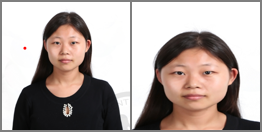

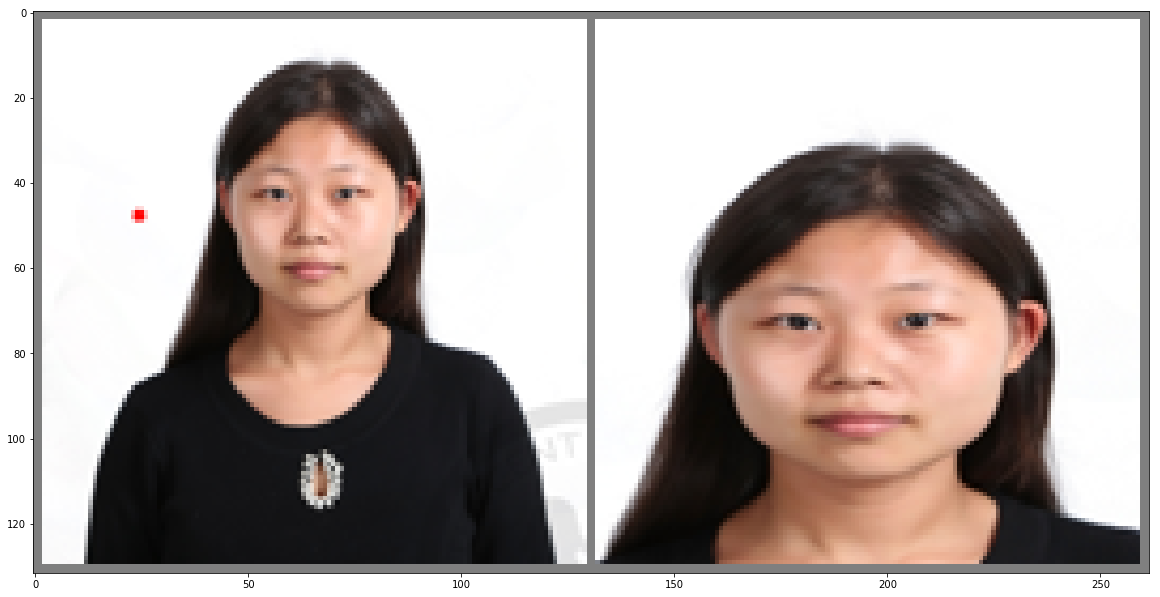

In [47]:
lambda1 = 77.0
lambda2 = 200.0
lambda3 = 111.0
attr = align.face_detect(img_path)
print(attr)
im = Image.open(img_path)
B_ = align.align_eye_pad_ailab(im, attr, lambda1, lambda2, lambda3)
draw = ImageDraw.Draw(im)
draw.ellipse([attr['x1']-5, attr['y1']-5, attr['x1']+5, attr['y1']+5],fill = 'red')
visualize_test.show(torchvision.utils.make_grid([img_pre_128(im), img_pre_128(B_),]))

In [ ]:
import utils.align as align

reload(align)

def test_lambda_2(net, lambda1 = 77.0, lambda2 = 228.0, lambda3 = 111.0):
    img_path = './datasets/test_drop/trainB/kaceyqin.png'
    print(img_path)
    attr = align.face_detect(img_path)
    print(attr)
    im = Image.open(img_path).convert('RGB')
    B_ = align.align_eye_pad_ailab(im, attr, lambda1, lambda2, lambda3)
    fake_A_1 = visualize_test.test_img(B_, net['B'], img_pre_128, 128, eval_mode=True)
    visualize_test.show(torchvision.utils.make_grid([img_pre_128(im), img_pre_128(B_), fake_A_1.data[0].cpu()]))

test_lambda_2(net_1_male)